## Mathematics of Machine Learning

### 8th Exercise: Stochastic Gradient Descent

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

#### (0) Preparation

In [2]:
# Load data
X = np.genfromtxt("data_MNIST_78_X.csv", delimiter=',')
Y = np.genfromtxt("data_MNIST_78_Y.csv", delimiter=',')

In [3]:
# Transfom the labels in +1 (7) and -1 (8)
# y = (y == 7) - (y == 8)
for ind, val in enumerate(Y):
    if val == 7:
        Y[ind] = +1
    else:
        Y[ind] = -1

In [4]:
print(X.shape)
print(Y)
print(Y.shape)

(784, 12116)
[ 1.  1.  1. ... -1. -1. -1.]
(12116,)


In [5]:
# Size of the dataset
m = len(Y)
print(m)

12116


In [6]:
# Number of features (= dimension of the feature space)
d = X.shape[0]
print(d)

784


#### (1) Gradient Descent for Log-Loss

In [7]:
# Auxiliary quantities for faster calculation of y*(w*x+b):
X1 = np.r_[X, np.ones((1, m))]
X1Y = np.tile(Y, (X1.shape[0], 1)) * X1

def exp_XY(w): return np.exp(-np.dot(w.T, X1Y)).T


In [8]:
# Empirical log-Risk as a function of e = exp(- y*(w*x+b))
def RS(e): return np.mean(np.log(1 + e), axis=0)

In [9]:
# Gradient of the empirical log-Risk again as a function of e = exp(- y*(w*x+b))
def Grad_RS(e): return - np.divide((np.dot(X1, ((Y * e)/(1 + e)))), m)
# Grad_RS = @(e) - (X1 * ( (Y .* e)./(1+e) ) )/m;

In [10]:
# Estimate Lipschitz constant of the gradient according to lecture
L = 1/4 * np.mean(np.sum(X * X, axis = 0))
print(L)

22.100453956614945


In [11]:
# Maximum allowed step size according to lecture
eta = 1/L
print(eta)

0.045247939339304266


In [12]:
# Gradient Descent

n_iter = 10 # Step count
# n_iter = m

# Matrix of iterates
ws = np.zeros((d+1, n_iter+1)) 

# Start point w_0
ws[:, 0] = np.append(np.zeros((d, 1)), np.array([1])) 

In [13]:
for i in range(n_iter):
    # Calculation of exp(- y*(w*x+b))
    e = exp_XY(ws[:, i])
    # Gradient step
    ws[:, i+1] = ws[:, i] - eta * Grad_RS(e)

In [14]:
# Calculation of empirical risks for all iterates
Fs = RS(exp_XY(ws))
print(Fs)

[0.79617684 0.63888007 0.56253391 0.51537577 0.4792754  0.44906741
 0.42297626 0.40013429 0.37997485 0.36207024 0.34607894]


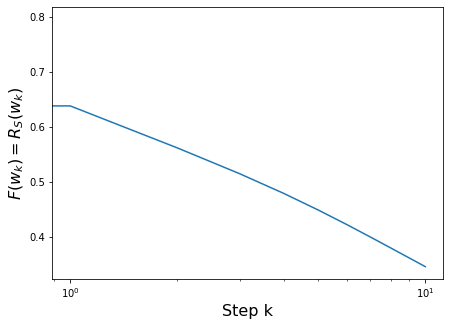

In [15]:
# Plot the function
fig, ax = plt.subplots(figsize=(7, 5))

plt.semilogx(Fs)

plt.xlabel('Step k', fontsize=16)
plt.ylabel('$ F(w_{k}) = R_S(w_k) $', fontsize=16)

plt.show()

#### (2) Stochastic Gradient Descent

In [16]:
# Number of steps and step sizes
n_iter_SGD = m
def eta_k(k): return 0.5/(1+k)

# Matrix of iterates
ws_SGD = np.zeros((d+1, n_iter_SGD+1))

#Start point w_0
ws_SGD[:, 0] = np.append(np.zeros((d, 1)), np.array([1])) 

In [17]:
for i in range(n_iter_SGD):
    ind = np.random.choice(m) # selecting random data point
    x = X1[:, ind] # corresponding feature x
    y = Y[ind] # corresponding label y
    e = np.exp(-np.dot(y, np.dot(ws_SGD[:, i].T, x))) # Calculation of exp(- y*(w*x+b))
    v = - np.dot((y*e/(1+e)), x) # Direction of the gradient for data point (x,y)
    
    # Gradient step
    ws_SGD[:, i+1] = ws_SGD[:, i] - eta_k(i) * v

In [18]:
# Calculation of empirical risks for all iterates
Fs_SGD = RS(exp_XY(ws_SGD))
print(Fs_SGD)

[0.79617684 2.56786641 2.57093726 ... 0.11268636 0.11268322 0.11268313]


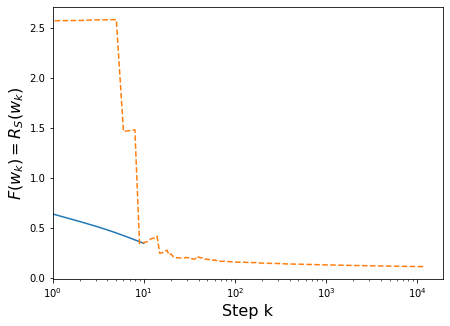

In [19]:
# Plot the function
fig, ax = plt.subplots(figsize=(7, 5))

plt.semilogx(Fs)
plt.semilogx(Fs_SGD, '--')

plt.xlim(xmin=10e-1)

plt.xlabel('Step k', fontsize=16)
plt.ylabel('$ F(w_{k}) = R_S(w_k) $', fontsize=16)

plt.show()

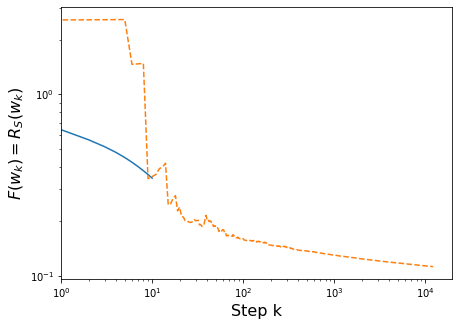

In [20]:
# Plot the function
fig, ax = plt.subplots(figsize=(7, 5))

plt.loglog(Fs)
plt.loglog(Fs_SGD, '--')

plt.xlim(xmin=10e-1)

plt.xlabel('Step k', fontsize=16)
plt.ylabel('$ F(w_{k}) = R_S(w_k) $', fontsize=16)

plt.show()